<a href="https://colab.research.google.com/github/guebin/MP2024/blob/main/posts/06wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

In [ ]:
# {{<video https://youtu.be/playlist?list=PLQqh36zP38-xVu7C7RnIszcBO3yGUbR0s&si=vT4OKdaxP4GPQWlF >}}

# 2. ref

ref: <https://huggingface.co/docs/transformers/tasks/video_classification>

`-` 실행이 되지 않음

![](https://github.com/guebin/MP2024/blob/main/posts/fig1.png?raw=true)

`-` 해결방법:

1. 위의 그림에서 `/usr/local/lib/python3.10/dist-packages/pytorchvideo/transforms/augmentations.py` 를 클릭
2. 아래의 그림과 같이 코드를 수정

![](https://github.com/guebin/MP2024/blob/main/posts/fig2.png?raw=true)

# 3. 예비학습

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio
import IPython.display

## A. 이미지 자료의 이해

`-` `plt.imshow(...)` 에서 `...` 자리에 오는 numpy array의 shape이 (??,??) 와 같이 2차원 꼴이면 흑백이미지를 출력

In [ ]:
np.array([[0, 150], [0,255]])

array([[  0, 150],
       [  0, 255]])

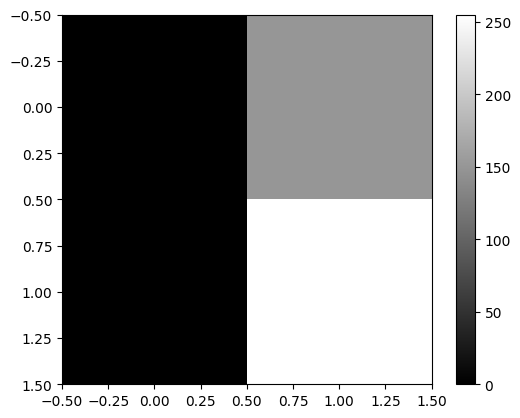

In [ ]:
plt.imshow(np.array([[0, 150], [0,255]]),cmap='gray')
plt.colorbar()

`-` `plt.imshow(...)` 에서 `...` 자리에 오는 numpy array의 shape이 (??,??,3) 이러한 형태이면 칼라이미지를 출력

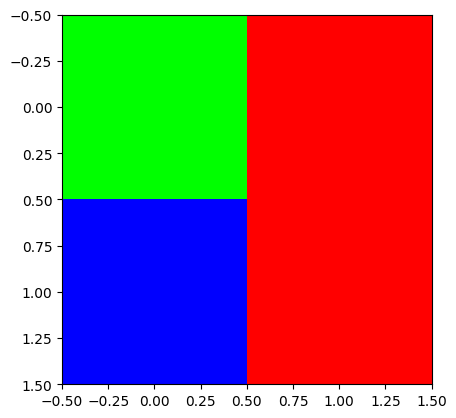

In [ ]:
R = np.array([[0,255],
              [0,255]])
G = np.array([[255,0],
              [0,  0]])
B = np.array([[0,  0],
              [255,0]])
plt.imshow(np.stack([R,G,B],axis=-1))

`-` `plt.imshow(...)`에서 `...` 자리에 오는 numpy array 의 dtype이 int인지 float인지에 따라서 시각화 결과가 다름

- int일 경우: 0을 최소값, 255를 최대값으로 생각하고 그림을 그려줌.
- float일 경우: 0.0을 최소값, 1.0을 최대값으로 생각하고 그림을 그려줌.

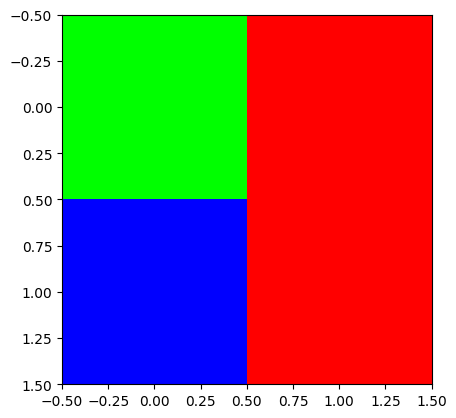

In [ ]:
R = np.array([[0,1],
              [0,1]])
G = np.array([[1,0],
              [0,0]])
B = np.array([[0,0],
              [1,0]])
#plt.imshow(np.stack([R,G,B],axis=-1))
plt.imshow(np.stack([R,G,B],axis=-1).astype(float))

## B. `tsr.permute()`

`-` 실수로 R,G,B 를 이상한 방식으로 stack 했다고 가정하자.

In [ ]:
R = np.array([[0,255],[0,255]])
G = np.array([[255,0],[0,0]])
B = np.array([[0,0],[255,0]])
# img = np.stack([R,G,B],axis=-1) # <-- 원래는 이걸 하려고 했었음..
img = np.stack([R,G,B]) # <-- 실수로 이렇게 만들었다고 하자...
imgb.shape

(3, 2, 2)

`-` 차원이 맞지 않아서 `plt.imshow(img)`이 동작하지 않음. 동작하기 위해서는 `plt.imshow(...)` 에서 `...` 자리에 있는 numpy array가 HWC 와 같은 형식으로 되어야함. (그런데 지금은 CHW 임)

TypeError: Invalid shape (3, 2, 2) for image data

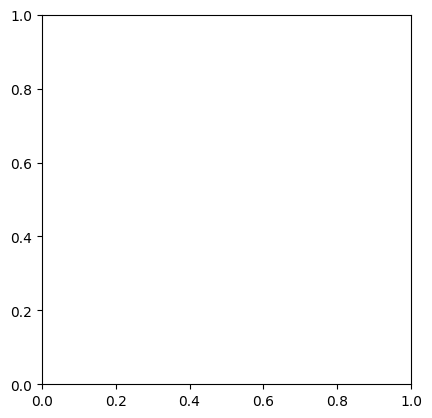

In [ ]:
plt.imshow(img)

`-` 에러를 피하기 위해서는 차원을 `(3,2,2)` 에서 `(2,2,3)` 으로 바꾸어야함.

In [ ]:
img.reshape(2,2,3)

array([[[  0, 255,   0],
        [255, 255,   0]],

       [[  0,   0,   0],
        [  0, 255,   0]]])

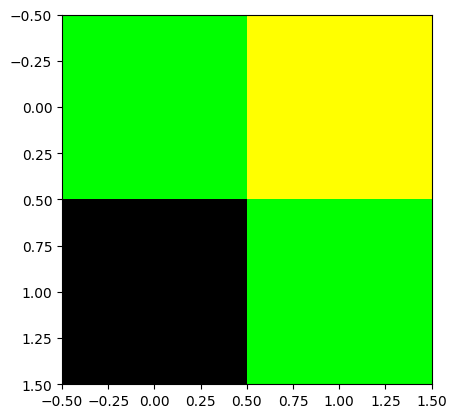

In [ ]:
plt.imshow(img.reshape(2,2,3)) # ?? 이상한 그림이 나왔음

- 우리가 원하는 그림은 아니네??
- 왜 이런일이 생기는가??

`-` 이미지자료의 차원을 바꾸고 싶다면 `reshape`을 쓰지 말고 `np.transpose`를 이용하라

In [ ]:
img.reshape(2,2,3),  np.transpose(img,(1,2,0))

(array([[[  0, 255,   0],
         [255, 255,   0]],
 
        [[  0,   0,   0],
         [  0, 255,   0]]]),
 array([[[  0, 255,   0],
         [255,   0,   0]],
 
        [[  0,   0, 255],
         [255,   0,   0]]]))

- 위의 두개의 array는 차원이 같음. $\to$ 그림자체는 둘다 그려짐
- 그렇지만 같은 array는 아님 $\to$ 당연히 그림도 달라짐

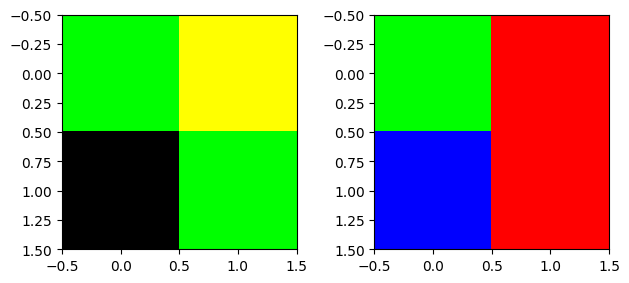

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img.reshape(2,2,3))
ax[1].imshow(np.transpose(img, (1,2,0)))
fig.tight_layout()

- 왼쪽은 이상한 그림, 오른쪽은 우리가 원하는 그림

`-` numpy array 가 아니고 pytorch tensor 일 경우에는 아래의 방법으로 변환

In [ ]:
arr = np.random.rand(2,4,3)
tsr = torch.tensor(arr)

In [ ]:
np.transpose(arr,(2,0,1)) # (2,4,3) --> (3,2,4)

array([[[0.27584702, 0.16815745, 0.25444792, 0.09475079],
        [0.048859  , 0.65654418, 0.03159763, 0.94437341]],

       [[0.41382948, 0.35974014, 0.65847267, 0.19946487],
        [0.59239361, 0.01188166, 0.84137569, 0.0137725 ]],

       [[0.06343953, 0.67152107, 0.12494941, 0.59637759],
        [0.3006623 , 0.03906701, 0.95668485, 0.7986497 ]]])

In [ ]:
tsr.permute(2,0,1) # (2,4,3) --> (3,2,4)
# np.transpose(tsr,(2,0,1)) # 같은코드

tensor([[[0.2758, 0.1682, 0.2544, 0.0948],
         [0.0489, 0.6565, 0.0316, 0.9444]],

        [[0.4138, 0.3597, 0.6585, 0.1995],
         [0.5924, 0.0119, 0.8414, 0.0138]],

        [[0.0634, 0.6715, 0.1249, 0.5964],
         [0.3007, 0.0391, 0.9567, 0.7986]]], dtype=torch.float64)

## C. 영상 자료 이해

`-` 영상자료 = 여러사진들의 모음 = [사진1, 사진2, 사진3, 사진4, ....]

In [ ]:
np.random.seed(43052)
v = (np.random.rand(4,60,60,3)*255).astype("uint8")
v[0,:,:,0] = 255 # 첫번쨰 프레임의 R 채널을 모두 최대치로 설정
v[1,:,:,1] = 255 # 두번쨰 프레임의 G 채널을 모두 최대치로 설정
v[2,:,:,2] = 255 # 세번째 프레임의 B 채널을 모두 최대치로 설정

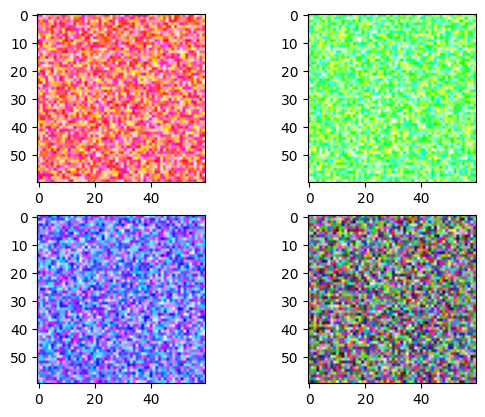

In [ ]:
fig, ax = plt.subplots(2,2)
# ax[0][0].imshow(v[0,:,:,:])
# ax[0][1].imshow(v[1,:,:,:])
# ax[1][0].imshow(v[2,:,:,:])
# ax[1][1].imshow(v[3,:,:,:])
ax[0][0].imshow(v[0])
ax[0][1].imshow(v[1])
ax[1][0].imshow(v[2])
ax[1][1].imshow(v[3])

In [ ]:
frames = [frame for frame in v]
#frames = [사진1, 사진2, 사진3, 사진4]

In [ ]:
imageio.mimsave("sample.gif",frames)

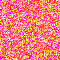

In [ ]:
IPython.display.Image("sample.gif")

## D. `np.clip()`

In [ ]:
arr = np.array([[300, -20, 150], [400, 100, 0], [255, 500, -100]])
arr

array([[ 300,  -20,  150],
       [ 400,  100,    0],
       [ 255,  500, -100]])

In [ ]:
np.clip(arr,0,255)

array([[255,   0, 150],
       [255, 100,   0],
       [255, 255,   0]])

# 4. 살펴보기

In [8]:
import huggingface_hub
import tarfile

## A. 다운로드

`-` 처음에는 `/root/.cache` 에 `huggingface`라는 폴더가 존재하지 않음

In [6]:
file_path = huggingface_hub.hf_hub_download(
    repo_id="sayakpaul/ucf101-subset",
    filename="UCF101_subset.tar.gz",
    repo_type="dataset"
)

UCF101_subset.tar.gz:   0%|          | 0.00/171M [00:00<?, ?B/s]

In [7]:
file_path

'/root/.cache/huggingface/hub/datasets--sayakpaul--ucf101-subset/snapshots/b9984b8d2a95e4a1879e1b071e9433858d0bc24a/UCF101_subset.tar.gz'

`-` 위의명령어를 실행하면 `/root/.cache` 에 적당한 폴더가 만들어지고 `UCF101_subset.tar.gz` 와 같은 파일이 다운로드 되어있음

`-` `huggingface_hub.hf_hub_download` 함수의 역할: (1) `UCF101_subset.tar.gz` 파일을 다운로드 (2) 다운로드한 압축파일의 경로를 `str`으로 리턴

## B. 압축풀기

In [21]:
!rm -rf asdf2

`-` 아래의 코드는 현재폴더에 `UCF101_subset.tar.gz` 파일의 압축을 해제하는 코드이다.

In [12]:
# file_path는 다운로드한 압축파일이 존재하는 경로와 파일명이 string으로 저장되어있음.
with tarfile.open(file_path) as t:
     t.extractall(".") # 여기에서 "."은 현재폴더라는 의미

`-` `tarfile.TarFile`의 인스턴스 `t` 가 가지는 주요기능

In [33]:
t = tarfile.open(file_path)
t.extractall("./asdf")

`-` `tarfile.TarFile`의 인스턴스 `t`가 가지는 덜 중요한 기능: 더 이상 압축을 풀고 싶지 않을때, `t.close()`를 이용하여 `t.extractall()`을 봉인할 수 있다.

In [43]:
t = tarfile.open(file_path) # t 오브젝트 생성
t.closed # 오브젝트 생성 직후에는 t.closed 는 False

False

In [35]:
t.extractall("./여기에")

In [36]:
t.extractall("./저기에")

In [37]:
t.close() # 더이상 무분별하게 압축을 풀고싶지 않다면 이걸 실행

In [42]:
t.closed # 그렇다면 t.closed 가 True로 되고

True

In [41]:
t.extractall("./또풀어") # 에러발생

OSError: TarFile is closed

`-` `tarfile.TarFile`의 인스턴스 `t`가 가지는 덜 중요한 기능2: `t._check()` 은 t.closed = True일때 실행하면 에러를 발생시키는 역할을 한다.

In [47]:
print(t.closed)
t._check() # t.closed 가 open 일 경우에는 에러X

False


In [48]:
t.close()
print(t.closed)
t._check() # t.closed 가 open 일 경우에는 에러X

True


OSError: TarFile is closed

`-`

*아래와 같은 코드를 작성하고 싶음*

```Python
1. `t`를 만듦. 즉 `TarFile`의 인스턴스를 만듦.
2. `t`가 열린상태인지 체크 (=압축풀기가 가능한 상태인지 체크를 해줌, 닫힌상태라면 에러메시지 발생하고 진행중지)
3. 압축해제
4. `t`를 닫힌상태로 만듦.
```

*아래와 같이 쓸 수 있음*

In [53]:
t = tarfile.open(file_path)
t._check()
t.extractall(".")
t.close()

*위의 코드는 아래의 코드와 같은 효과*

In [55]:
with tarfile.open(file_path) as t:
  ## 시작코드 -- t._ckech() 이 자동실행 (사실은 t.__enter__()이 실행)
  t.extractall(".") ## 본코드
  ## 마무리코드 -- t.close() 이 자동실행 (사실은 t.__exit__()이 실행)

In [58]:
t.closed # 예쁘게 잘 닫혀있음..

True

::: {.callout-note}

`with ... as ???:`에서 `???` 자리에 들어가는 오브젝트는 `__enter__()`와 `__exit__()`라는 숨겨진 메서드를 가진 오브젝트여야 한다. 

```Python
import tarfile

# tar 파일을 열고 자동으로 닫아주는 with 문 사용
with tarfile.open('example.tar.gz') as tar:  # tarfile 객체는 __enter__, __exit__ 메서드를 가짐
    tar.extractall(path='output_folder')  # 본래 코드: tar 파일 안의 파일들을 추출
# 여기서 `tar.__exit__()`가 호출되어 tar 파일이 자동으로 닫힘
```
    
위의 예시에서 `tarfile.open()`이 반환하는 `tar` 오브젝트가 `__enter__()`와 `__exit__()` 를 가지고 있다. 위의 코드가 실행되는 원리는 대략적으로 아래와 같다. 

1. **with 문이 실행되면**, 먼저 `tar.__enter__()`가 호출된다. 이 메서드는 tar 파일을 열고, 파일을 처리할 준비를 한다.
   
   ```python
   tarfile.open('example.tar.gz')  # 이 때 tar.__enter__() 호출
   ```

2. **본래 코드 실행**: 이후 with 문 안의 본래 코드, 즉 `tar.extractall(path='output_folder')`가 실행되어 tar 파일의 내용을 추출한다.

   ```python
   tar.extractall(path='output_folder')  # 본래 코드 실행
   ```

3. **with 문이 종료될 때**, `tar.__exit__()` 메서드가 호출되어 tar 파일이 자동으로 닫힌다. 이로 인해 파일을 명시적으로 닫을 필요가 없어지며, 자원 관리가 안전하게 이루어진다.

   ```python
   # with 문 종료 시 tar.__exit__() 호출
   ```

이렇게 with 문은 `__enter__()`와 `__exit__()` 메서드를 가진 객체를 활용하여, 자원의 열림과 닫힘을 자동으로 처리하는 구조이다.
:::